## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('priv_data_clean.csv')
df.head()

,index,Location,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,...,Event.Day,Event.Month,Event.Month.Name,Event.Year,Total.Passengers,Total.Injured,Percent.Injured,Percent.Uninjured,Percent.Died,Airplane.Type
0,0,ID,United States,Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,2.0,...,24,10,October,1948,2.0,2.0,100.000000,0.000000,100.0,Private
1,1,CA,United States,Destroyed,Piper,Pa24-180,1.0,Reciprocating,Personal,4.0,...,19,7,July,1962,4.0,4.0,100.000000,0.000000,100.0,Private
2,2,VA,United States,Destroyed,Cessna,172M,1.0,Reciprocating,Personal,3.0,...,30,8,August,1974,3.0,3.0,100.000000,0.000000,100.0,Private
3,3,CA,United States,Destroyed,Rockwell,112,1.0,Reciprocating,Personal,2.0,...,19,6,June,1977,2.0,2.0,100.000000,0.000000,100.0,Private
4,4,MA,United States,Substantial,Mcdonnel Douglas,Dc9,2.0,Turbo Fan,Unknown,0.0,...,17,9,September,1979,45.0,1.0,2.222222,97.777778,0.0,Private


## Visualize KPIs

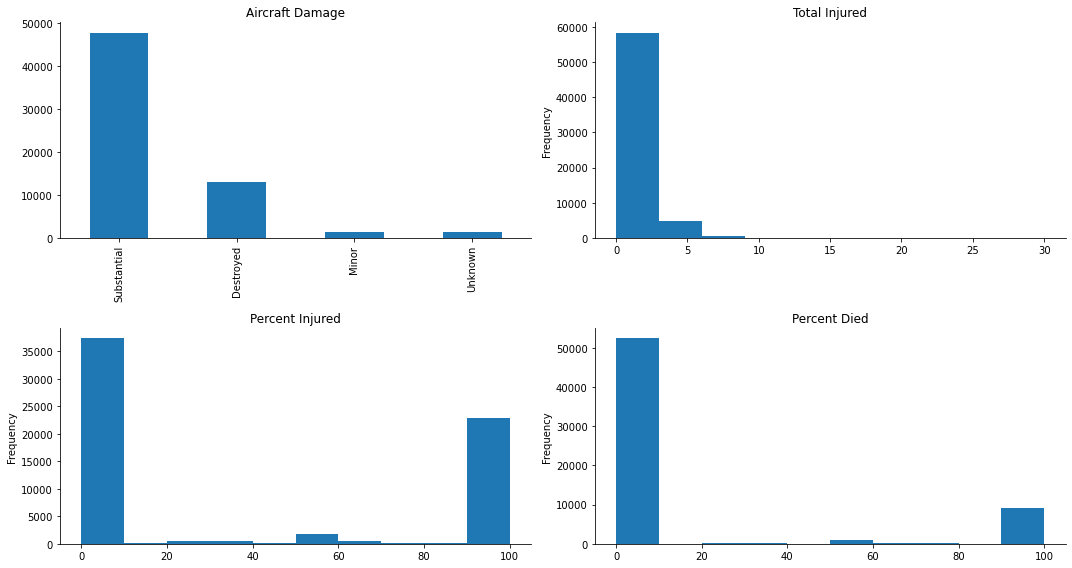

In [4]:
fig, ax = plt.subplots(2,2, figsize = ((15,8)))


df['Aircraft.damage'].value_counts().plot.bar(ax=ax[0,0]);
ax[0, 0].set_title("Aircraft Damage")
ax[0, 0].set_xlabel("")

df['Total.Injured'].plot.hist(ax=ax[0,1], range=[0,30])
ax[0, 1].set_title("Total Injured")
ax[0, 1].set_xlabel("")

df['Percent.Injured'].plot.hist(ax=ax[1,0])
ax[1, 0].set_title("Percent Injured")
ax[1, 0].set_xlabel("")

df['Percent.Died'].plot.hist(ax=ax[1,1]);
ax[1, 1].set_title("Percent Died")
ax[1, 1].set_xlabel("")

plt.tight_layout()
sns.despine()

In [5]:
#popular_makes = df['Make'].value_counts()
#popular_makes = list(popular_makes[popular_makes > 100].index)
popular_makes = list(df['Make'].value_counts().index)

print(f"top makes: {popular_makes}")

top makes: ['Cessna', 'Piper', 'Beech', 'Bell', 'Boeing', 'Mooney', 'Grumman', 'Bellanca', 'Hughes', 'Air Tractor', 'Aeronca', 'Maule', 'Mcdonnel Douglas', 'Champion', 'Stinson', 'Cirrus', 'Luscombe', 'Aero Commander', 'Taylorcraft', 'Schweizer', 'De Havilland', 'North American', 'Aerospatiale', 'Hiller', 'Rockwell', 'Airbus', 'Enstrom', 'Grumman American', 'Ayres', 'Embraer', 'Sikorsky', 'Swearingen', 'Ercoupe Eng & Research Corp', 'Lake', 'Fairchild', 'Waco', 'Aviat', 'Mitsubishi', 'Bombardier', 'GrummanSchweizer', 'Socata', 'Learjet', 'Pitts', 'Lockheed', 'Burkhart Grob', 'Schleicher', 'Vans', 'Balloon Works', 'UNKNOWN']


## Damage Index

In [6]:
unk_indices = list(df.loc[df['Aircraft.damage'] == 'Unknown'].index)

damage_probs = df['Aircraft.damage'].value_counts()
damage_probs = damage_probs.drop('Unknown')
damage_probs = damage_probs / damage_probs.sum()
rand_damage = np.random.choice(list(damage_probs.index), size = len(unk_indices), p = list(damage_probs))

adj_df = df.copy()
adj_df['Aircraft.damage'].iloc[unk_indices] = rand_damage
pop_means_df = adj_df.groupby('Make').mean(numeric_only=True)

di_df = pd.DataFrame(columns = ['Damage_Index', 'Make_Num_Incidents', 'Uninjured_P', 'Injured_P', 'Died_P'], )

for make in popular_makes:
    make_info = adj_df[adj_df['Make'] == make]['Aircraft.damage'].value_counts(normalize=True)

    if 'Minor' not in make_info.index:
        make_info['Minor'] = 0

    damage_index = (make_info['Destroyed'] * 4) + (make_info['Substantial'] * 2) + (make_info['Minor'] * 1)

    num_incidents = adj_df['Make'].value_counts()[make]

    make_stats = list(pop_means_df.loc[make].reindex(['Percent.Uninjured', 'Percent.Injured', 'Percent.Died']))

    di_df.loc[make] =[damage_index, num_incidents] + make_stats

KeyError: 'Destroyed'

In [ ]:
threshold = 1000
penalty_rate = 0.5
di_df['Penalty'] = di_df['Make_Num_Incidents'].apply(lambda x: 1 + penalty_rate * np.log(threshold/x) if x < threshold else 1)
di_df['Adj_Damage_Index'] = di_df['Damage_Index'] * di_df['Penalty'] 
di_df.sort_values(by = 'Adj_Damage_Index')

In [ ]:
pd.plotting.scatter_matrix(di_df[['Adj_Damage_Index', 'Uninjured_P', 'Injured_P', 'Died_P']]);

In [ ]:
di_df = di_df.sort_values(by = 'Adj_Damage_Index')
di_df

In [ ]:
best_dest = df.loc[(df['Aircraft.damage'] == 'Destroyed') & (df['Percent.Died'] == 0) & (df['Event.Year'] > 1989) & (df['Percent.Injured'] == 0) & (df['Total.Passengers'] != 0)]
best_subs = df.loc[(df['Aircraft.damage'] == 'Substantial') & (df['Percent.Died'] == 0) & (df['Event.Year'] > 1989) & (df['Total.Passengers'] != 0)]
best_minor = df.loc[(df['Aircraft.damage'] == 'Minor') & (df['Percent.Died'] == 0) & (df['Percent.Injured'] == 0) & (df['Event.Year'] > 1989) & (df['Total.Passengers'] != 0)]

In [ ]:
'''
Destroyed: No deads, after 1989, No empty planes
Substantial: No deads, no injured, after 1989, no empty planes
Minor: 


'''

In [ ]:
d_d = best_dest['Model'].value_counts().to_dict()
d_s = best_subs['Model'].value_counts().to_dict()
d_m = best_minor['Model'].value_counts().to_dict()
all_keys = set()
all_keys.update(d_d.keys())
all_keys.update(d_s.keys())
all_keys.update(d_m.keys())
r_d  = {}
for key in all_keys:
    r_d[key] = d_d.get(key, 0) + d_s.get(key, 0) + d_m.get(key, 0)
result_d = {}
for key in all_keys:
    denominator = df['Model'].value_counts().to_dict().get(key, 1)
       
    if denominator != 0:
        result_d[key] = r_d[key] / denominator
    else:
        result_d[key] = 0 

In [ ]:
model_performance = pd.Series(result_d)

model_performance

In [ ]:
model_vc = df['Model'].value_counts()

In [ ]:
model_performance.isna().sum()

In [ ]:
model_pwdc = pd.concat({'Performance':model_performance, 'Amount of incidents Model':model_vc}, axis=1)
model_pwdc.sort_values(by='Amount of incidents Model',ascending=False)

In [ ]:
model_pwdc = model_pwdc.fillna(0)
model_pwdc.sort_values(by='Performance')

In [ ]:
joint = df.join(model_pwdc, how='outer',on='Model')
joint2 = joint.join(di_df, how='outer', on='Make')

In [ ]:
joint3 = joint2.loc[joint2['Amount of incidents Model'] >= 20]joint3['Damage.index.top3'] = joint3['Make'].apply(lambda x: x in ['Boeing', 'Cessna', 'Piper'])
joint3['Damage.index.top3'] = joint3['Make'].apply(lambda x: x in ['Boeing', 'Cessna', 'Piper'])

In [ ]:
joint4 = joint3.loc[(joint3['Make'] == 'Boeing') | (joint3['Make'] == 'Cessna') | (joint3['Make'] == 'Piper')]
joint4.groupby('Make').mean()

In [ ]:
joint3['Damage.index.top3'] = joint3['Make'].apply(lambda x: x in ['Boeing', 'Cessna', 'Piper'])
#joint3['Damage.index.top3'] = pd.Series(['Yes' if x in ['Boeing', 'Cessna', 'Piper'] else 'No' for x in joint3['Make']]])


In [ ]:
joint3['Damage.index.top3'].value_counts()

In [ ]:
joint4['Model'].value_counts()

In [ ]:
joint4.sort_values(by='Performance', ascending=False).groupby('Model').mean()[:5]